# HEART DISEASE PREDICTION MODEL

HEART DATA ---> DATA PRE PROCESSING ---> TRAIN TEST SPLIT ---> LOGISTIC REGRESSION MODEL(because it is a binary classification situation i.e. either the person has disease or no)----> we will then train the model by training data it get a TRAINED LOGISTIC REGRESSION MODEL ---> to this model we will feed new data so that the trained model can predict whether the person has heart disease or not.

**IMPORTING THE LIBRARIES**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import root_mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Data Collection and Processing

**Context About DataSet**:

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [2]:
# loading the csv data to a Pandas DataFrame
path = r"C:\Users\ASHUTOSH YADAV\OneDrive\Desktop\Bhumi\PROJECTS\Heart_Disease_app\heart_disease_dataset.csv"
heart_data = pd.read_csv(path)

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# no. of rows and columns in dataset
heart_data.shape

(1025, 14)

In [6]:
# getting some info about Data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable 
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1 ---> Defective Heart(526)        
2 ---> Healthy Heart(499)                                           
We have 526 people with heart disease and 499 people without heart disease, so our problem is balanced.

<Axes: xlabel='target'>

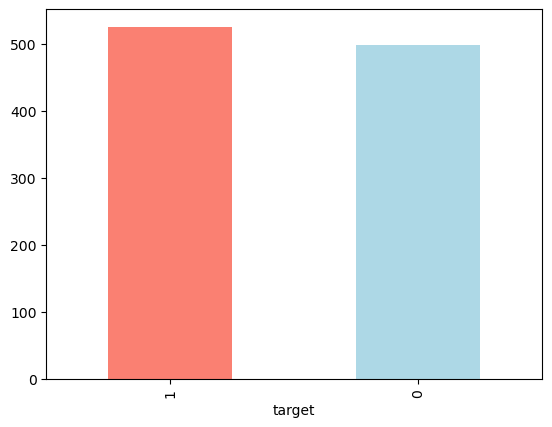

In [10]:
# showcasing the Target Distribution
heart_data.target.value_counts().plot(kind='bar',color=['salmon','lightblue'])

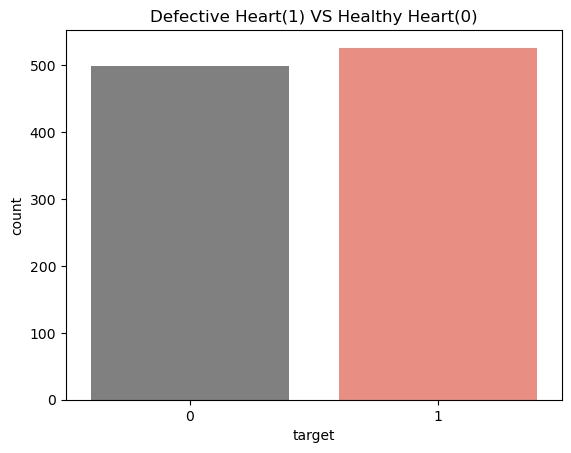

In [11]:
sns.countplot(x='target',data=heart_data,palette=['grey','salmon'])
plt.title('Defective Heart(1) VS Healthy Heart(0)')
plt.show()

**VISUALISATION**

In [12]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
for i in heart_data:
    print(heart_data[i].value_counts())

age
58    68
57    57
54    53
59    46
52    43
56    39
51    39
62    37
60    37
44    36
64    34
41    32
63    32
61    31
67    31
55    30
65    27
42    26
43    26
53    26
45    25
66    25
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
38    12
68    12
71    11
40    11
69     9
34     6
37     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
152     17
145     17
134     17
170     15
122     14
100     14
136     11
180     10
126     10
142      9
115      9
105      9
146      8
148      7
94       7
178      7
102      6
144      6
165      4
200      4
114      4
154      4
117      4
123      4
104      3
106      3
174      3
129      3
192   

In [14]:
continuous_value = []     # for histplot
categorical_value = []    # for barplot

for column in heart_data.columns:
    
    print('-'*100)
    print(f'{column} : {heart_data[column].unique()}')
    
    if len(heart_data[column].unique())<10:
        categorical_value.append(column)
    else:
        continuous_value.append(column)

----------------------------------------------------------------------------------------------------
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
----------------------------------------------------------------------------------------------------
sex : [1 0]
----------------------------------------------------------------------------------------------------
cp : [0 1 2 3]
----------------------------------------------------------------------------------------------------
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
----------------------------------------------------------------------------------------------------
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 

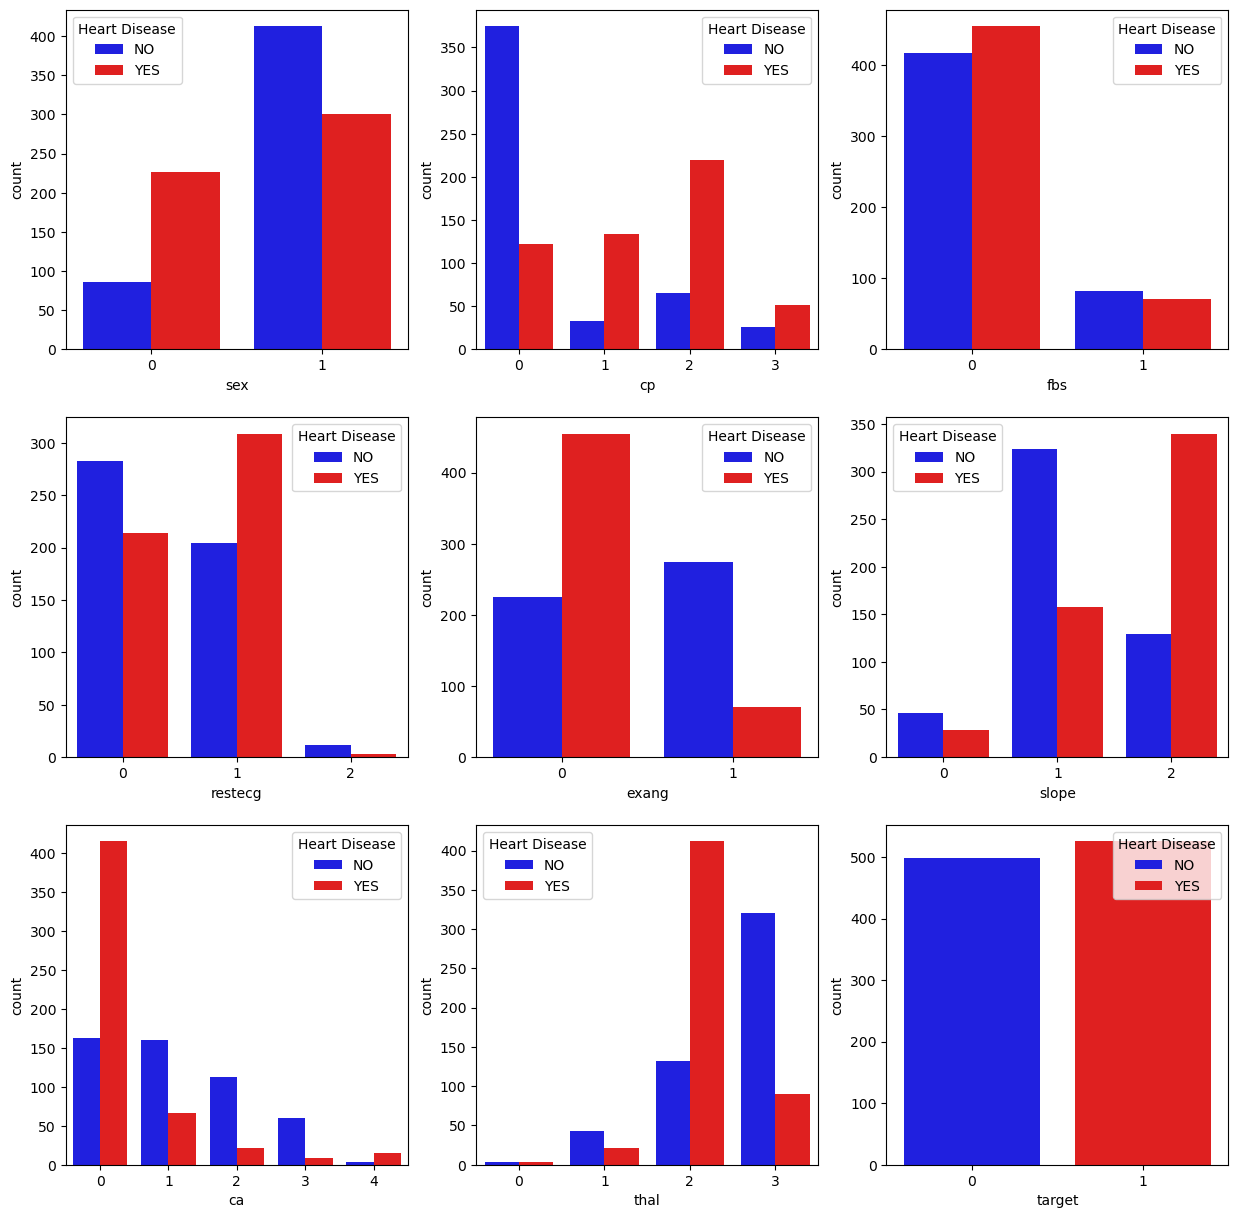

In [15]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_value, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=heart_data, x=column, hue='target', palette=['blue', 'red'])
    plt.xlabel(column)
    plt.legend(title='Heart Disease', labels=['NO', 'YES'])

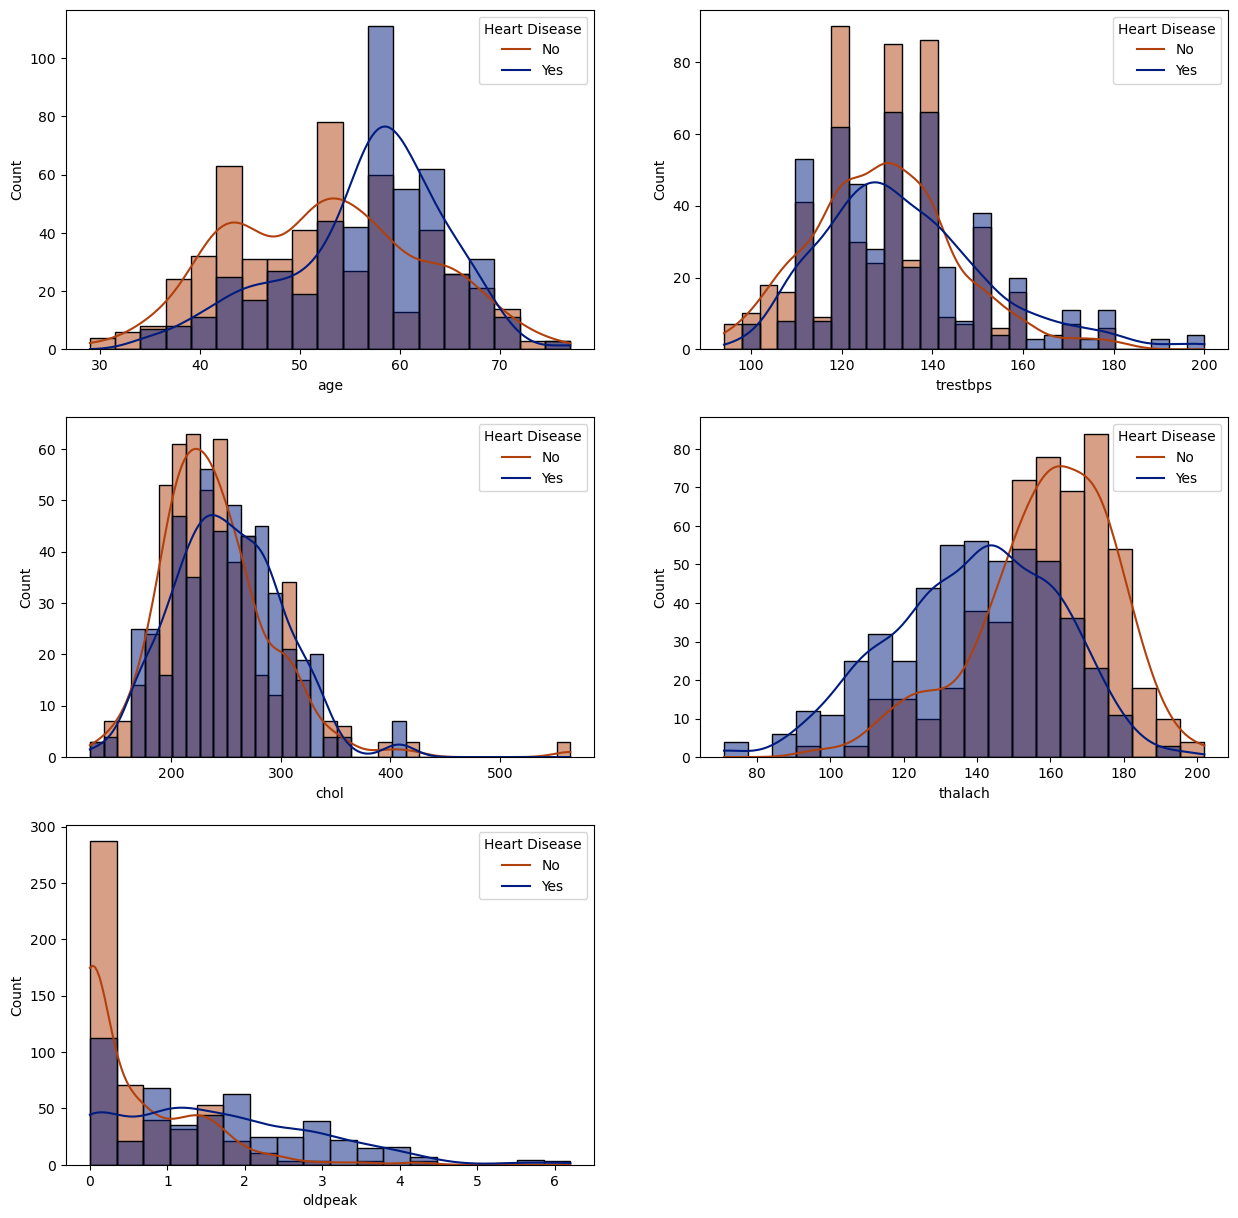

In [16]:
plt.figure(figsize=(15,15))
c = 1
for i in continuous_value:
    plt.subplot(3,2,c)
    sns.histplot(data=heart_data,x=i,hue='target',kde=1,palette='dark')
    plt.legend(title='Heart Disease',labels=['No','Yes'])
    c+=1

<Axes: xlabel='age', ylabel='sex'>

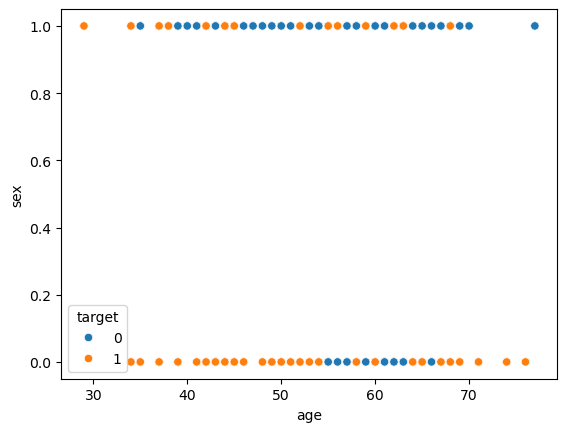

In [17]:
sns.scatterplot(data=heart_data, x='age', y='sex', hue='target')

In [18]:
# correlation matrix
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


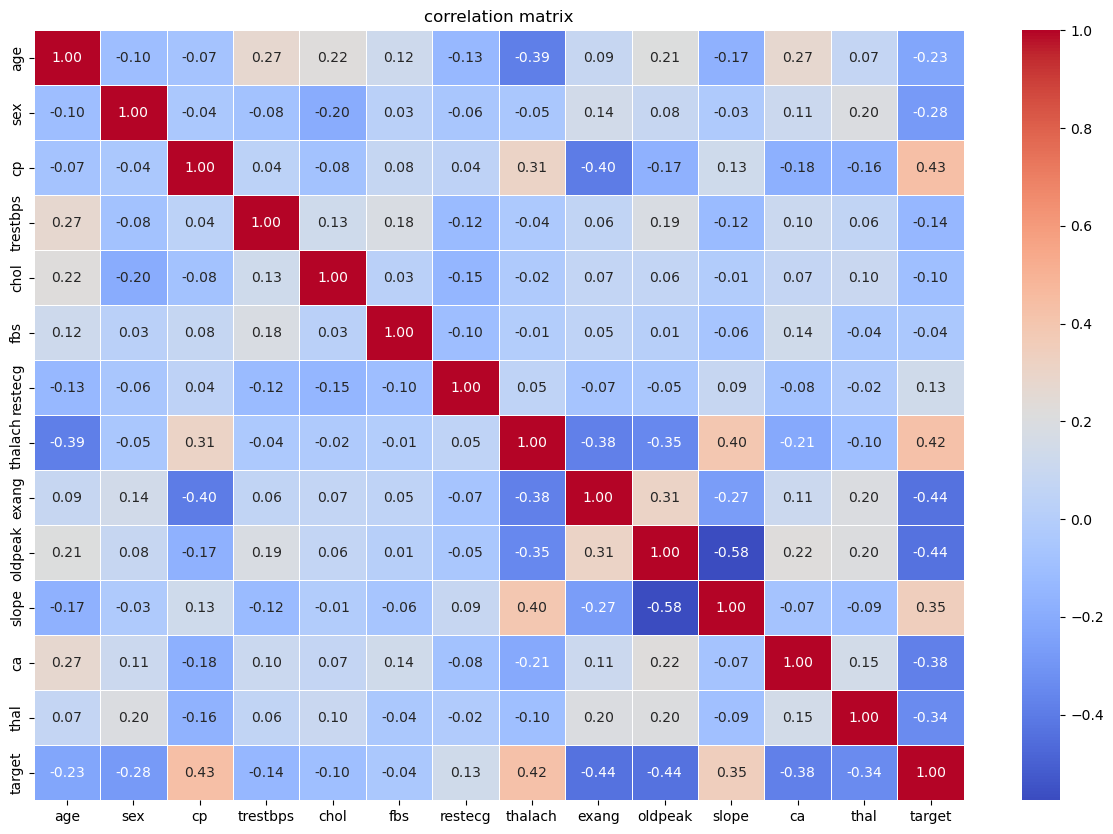

In [19]:
# visualization of matrix on heatmap
plt.figure(figsize=(15,10))
sns.heatmap(heart_data.corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="coolwarm")
plt.title('correlation matrix')
plt.show()

**Extracting feature and label**
This separation is important because the machine learning model needs to learn the relationship between input features and the target during training, without being directly exposed to the answers. This ensures a fair and effective learning process. Later, we further divide X and y into training and testing sets to evaluate the model's performance on unseen data. This process helps in building models that generalize well to real-world predictions.

In [20]:
feature = heart_data.drop(['target'],axis=1)
target = heart_data[['target']]

In [21]:
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [22]:
target.sample(5)

,target
481,0
714,1
177,0
458,1
154,0


**Splitting data into training and testing data**

In [23]:
feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2)

In [24]:
print('shape of feature data: ',feature.shape)
print('shape of feature_train data: ',feature_train.shape)
print('shape of feature_test data: ', feature_test.shape)

shape of feature data:  (1025, 13)
shape of feature_train data:  (820, 13)
shape of feature_test data:  (205, 13)


In [25]:
print('shape of target data : ',target.shape)
print('shape of target_train data: ',target_train.shape)
print('shape of target_test data: ',target_test.shape)

shape of target data :  (1025, 1)
shape of target_train data:  (820, 1)
shape of target_test data:  (205, 1)


# MODEL TRAINING                                        
**Using The Logistic Regression Model : It fits best for classifcation/binary predictions**

In [26]:
model = LogisticRegression()

In [27]:
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
# training the model with training data
model.fit(feature_train , target_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**Model Evaluation**

In [29]:
# accuracy of training dataset
ac = model.score(feature_train,target_train)
print('Accuracy of Training data is : ',ac)

Accuracy of Training data is :  0.85


In [30]:
# accurcay of testing dataset
ac2 = model.score(feature_test,target_test)
print('Accuracy of Testing data is : ',ac2)

Accuracy of Testing data is :  0.8341463414634146


**Model Evaluation Summary:**                                                                                     
After training a Logistic Regression model, we evaluated it on both training and test data. The training accuracy was around 85.85% and the test accuracy was around 84.39%, indicating good generalization.
To further assess the model, we will use a confusion matrix and classification report, which will help us understand the model’s performance in terms of precision, recall, and F1-score.



In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on test set
y_pred = model.predict(feature_test)

# Confusion Matrix
cm = confusion_matrix(target_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(target_test, y_pred)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[79 31]
 [ 3 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82       110
           1       0.75      0.97      0.84        95

    accuracy                           0.83       205
   macro avg       0.86      0.84      0.83       205
weighted avg       0.86      0.83      0.83       205



<Axes: >

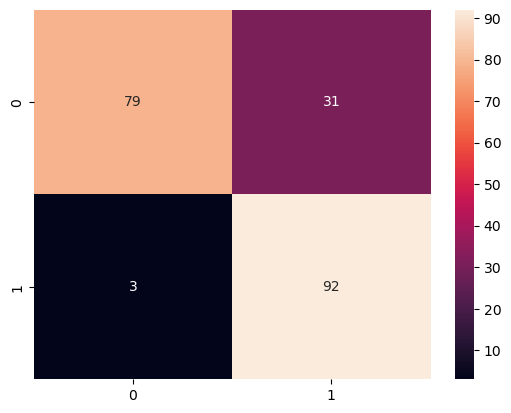

In [32]:
sns.heatmap(cm,annot=True)

**Trying other Classification Models**

In [33]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [34]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

result = {}

for name, model in models.items():
    model.fit(feature_train, target_train)
    ac_train = model.score(feature_train, target_train)
    ac_test = model.score(feature_test, target_test)
    result[name] = [ac_train, ac_test]   # Store both scores in a list

# Convert result to DataFrame
result_df = pd.DataFrame(list(result.items()), columns=["Model", "Accuracy Scores"])
result_df[['Train Accuracy', 'Test Accuracy']] = pd.DataFrame(result_df['Accuracy Scores'].tolist(), index=result_df.index)
result_df = result_df.drop(columns='Accuracy Scores')

print(result_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.850000       0.834146
1        Random Forest        1.000000       1.000000
2        Decision Tree        1.000000       0.985366
3                  KNN        0.906098       0.712195


# Building a Predective System

In [35]:
final_model = RandomForestClassifier()
final_model.fit(feature_train, target_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
input_data = (46,1,2,150,231,0,1,147,0,3.6,1,0,2)
input_array = np.asarray(input_data).reshape(1,-1)

prediction = final_model.predict(input_array)

if prediction[0] == 1:
    print('person have heart disease')
else:
    print('you are fine!')

you are fine!


# USER INTERFACE OF MODEL

In [37]:
# saving the model
import joblib
joblib.dump(final_model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']